# Linear Regression Analysis
### Table of Contents:

01. Libraries Import
02. Data Import
03. Data Cleaning
04. Data Prep for Regression Analysis
05. Regression Analysis
06. Final Observations

## 01. Libraries Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Adjusting the settings so that charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

## 02. Data Import

In [3]:
# Create a string path

path = r'C:\Users\rasmu\Documents\CareerFoundry\A6 National Parks Analysis'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepd Data', 'NatlParks_clean.csv'))

## 03. Data Cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'ParkName', 'UnitCode', 'Region', 'State', 'Year',
       'Month', 'RecVisits', 'NonRecVisits', 'RecHours', 'NonRecHours',
       'TentCampers', 'RVCampers', 'Backcountry', 'RecHrsRange'],
      dtype='object')

In [6]:
# Need to drop the 'Unnamed: 0' column

df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.shape

(7560, 14)

In [8]:
# Check for missing values

df.isnull().sum()

ParkName        0
UnitCode        0
Region          0
State           0
Year            0
Month           0
RecVisits       0
NonRecVisits    0
RecHours        0
NonRecHours     0
TentCampers     0
RVCampers       0
Backcountry     0
RecHrsRange     0
dtype: int64

No missing values.

In [9]:
# Duplicates check
dups = df.duplicated()

In [10]:
dups.shape

(7560,)

No duplicates.

## 04. Data Prep for Regression Analysis

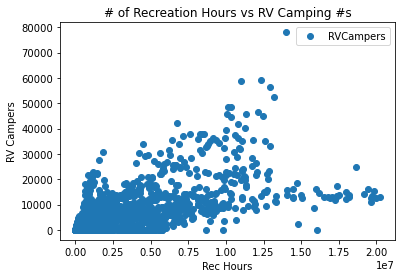

In [12]:
# Creating a scatterplot using matplotlib for a look at how the variables plot against each other.

df.plot(x = 'RecHours', y='RVCampers',style='o')
plt.title('# of Recreation Hours vs RV Camping #s')  
plt.xlabel('Rec Hours')  
plt.ylabel('RV Campers')  
plt.show()

### Hypothesis
The greater the amount of recreation hours per national park, the greater the amount of RV Campers in the parks.

In [13]:
# Reshaping the variables into NumPy arrays

X = df['RecHours'].values.reshape(-1,1)
y = df['RVCampers'].values.reshape(-1,1)

In [14]:
X

array([[  78738],
       [  81758],
       [ 149716],
       ...,
       [2902495],
       [1932994],
       [1321213]], dtype=int64)

In [15]:
y

array([[   0],
       [   0],
       [   0],
       ...,
       [7181],
       [5431],
       [4798]], dtype=int64)

In [16]:
# Spliting data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 05. Regression Analysis

In [17]:
# Creating a regression object

regression = LinearRegression()  

In [18]:
# Fitting the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

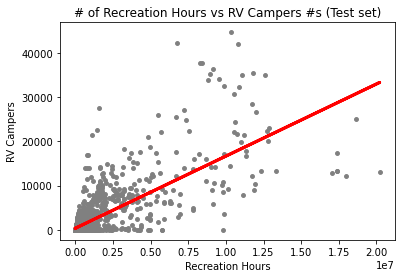

In [20]:
# Creating a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('# of Recreation Hours vs RV Campers #s (Test set)')
plot_test.xlabel('Recreation Hours')
plot_test.ylabel('RV Campers')
plot_test.show()

#### Regression Line Observations

It's really hard to tell how acurate it is. It looks very close in the low levels of recreation hours, but once we get past 7,500,000 hours, data points look to be pretty far away from the line.

In [21]:
# Creating objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [22]:
# Determining the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00162926]]
Mean squared error:  9372150.510007624
R2 score:  0.5646997979046633


In [23]:
y_predicted

array([[ 374.40388098],
       [1131.61316786],
       [1862.910672  ],
       ...,
       [2008.5536601 ],
       [ 376.63596991],
       [ 376.51540452]])

In [24]:
# Creating a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,374.403881
1,0,1131.613168
2,0,1862.910672
3,0,374.094321
4,0,476.464111
5,213,412.826767
6,2257,1351.840511
7,0,468.627361
8,0,549.697808
9,0,374.094321


## 06. Final Observations

Sadly, the model did not seem to perform strong. An r2 of .565 and a MSE of 9,372,150 are indicators of that. While this is closer to 1 than 0, 56.5% still isn't strong enough.

When looking at the actual vs predicted y dataframe, I'm confident that the 0s have a lot to do with it. If they were to be removed, perhaps, that might make the regression stronger. 

With taking a quick look at the actual cleaned data set, I can already tell that the data points where RV Camping is 0 happens more due to incliment weather and during the COVID-19 pandemic times when parks weren't allowing people to stay overnight.

Perhaps the better indicators might be to remove data from 2020 altogether to even out things for that year. We'd still have annual averages, but they might be more reflective of how things were. Though, moving forward in the time of COVID, will things ever be like they previously were?

There is some data I'm wondering if it would be okay to remove... specifically months of the year where camping isn't allowed in lands (i.e. Acadia National Park in Maine clearly doesn't allow camping in winter and early spring months). If all I have to compare with Visits/Hours data is the camping data, then that makes sense. However, if I'm trying to compare overall visit/hours numbers among the sites, I shouldn't remove the data.